In [1]:
import pandas as pd

DIR = '../data/new data/'
# bitcoin_time_series = pd.read_csv("drive/MyDrive/File Skripsi/data_bitcoinity_full_daily.csv", parse_dates = ['Time'])
''' #bitcoinity data
bitcoin_time_series = pd.read_csv(DIR + "bitcoin_price_daily.csv", parse_dates = ['Time'])
gtrend_time_series = pd.read_csv(DIR + "daily_gtrend_data_new.csv", parse_dates = ['date'])
block_size = pd.read_csv(DIR + "block_size_cut.csv", parse_dates = ['Time'])
mining_difficulty = pd.read_csv(DIR + "mining_difficulty_daily_cut.csv", parse_dates = ['Time'])
number_of_transaction = pd.read_csv(DIR + "number_of_transaction_cut.csv", parse_dates = ['Time'])
'''

# cmc data
bitcoin_time_series = pd.read_csv(DIR + "cmc_plus_gold_fixed.csv", parse_dates = ['date'])
gtrend_time_series = pd.read_csv(DIR + "daily_gtrend_data_cmc.csv", parse_dates = ['date'])

In [2]:
# gtrend_time_series = pd.read_csv("drive/MyDrive/File Skripsi/daily_gtrend_data.csv", parse_dates = ['date'])

In [3]:
gtrend_time_series.tail()

,date,bitcoin,overlap
3119,2021-11-11,10.0,1.0
3120,2021-11-12,10.0,1.0
3121,2021-11-13,9.0,1.0
3122,2021-11-14,9.0,NaN
3123,2021-11-15,9.0,NaN


In [4]:
dataset = bitcoin_time_series.copy()
dataset['gtrend'] = gtrend_time_series['bitcoin']

In [5]:
dataset = dataset.drop(columns=['index'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        3124 non-null   datetime64[ns]
 1   open        3124 non-null   float64       
 2   high        3124 non-null   float64       
 3   low         3124 non-null   float64       
 4   close       3124 non-null   float64       
 5   volume      3124 non-null   float64       
 6   marketcap   3124 non-null   float64       
 7   gold_price  3124 non-null   float64       
 8   gtrend      3124 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 219.8 KB


In [6]:
dataset.corr()

,open,high,low,close,volume,marketcap,gold_price,gtrend
open,1.000000,0.999524,0.999150,0.998871,0.764514,0.998673,0.072090,0.534931
high,0.999524,1.000000,0.999071,0.999520,0.767455,0.999259,0.073242,0.541221
low,0.999150,0.999071,1.000000,0.999415,0.757674,0.999299,0.071338,0.523668
close,0.998871,0.999520,0.999415,1.000000,0.763104,0.999795,0.072700,0.534316
volume,0.764514,0.767455,0.757674,0.763104,1.000000,0.762293,0.086220,0.506935
marketcap,0.998673,0.999259,0.999299,0.999795,0.762293,1.000000,0.077240,0.522092
gold_price,0.072090,0.073242,0.071338,0.072700,0.086220,0.077240,1.000000,-0.047950
gtrend,0.534931,0.541221,0.523668,0.534316,0.506935,0.522092,-0.047950,1.000000


In [7]:
print('price mean :', dataset['open'].mean())
print('gtrend mean :', dataset['gtrend'].mean())
print('price stdv :', dataset['open'].std())
print('gtrend stdv :', dataset['gtrend'].std())

price mean : 8457.026504481439
gtrend mean : 5.092189500640205
price stdv : 14015.065825230788
gtrend stdv : 6.949971018486541


In [8]:
del gtrend_time_series
del bitcoin_time_series

In [9]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('open ~ volume+gtrend', data=dataset, return_type='dataframe')

In [11]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

In [12]:
vif

,VIF,variable
0,1.620732,Intercept
1,1.345864,volume
2,1.345864,gtrend


In [13]:
train_dates = dataset['date']
dataset.tail()

,date,open,high,low,close,volume,marketcap,gold_price,gtrend
3119,2021-11-11,64978.89,65579.01,64180.49,64949.96,3.588063e+10,1.225643e+12,1863.90,10.0
3120,2021-11-12,64863.98,65460.81,62333.91,64155.94,3.608489e+10,1.210715e+12,1868.50,10.0
3121,2021-11-13,64158.12,64915.67,63303.73,64469.53,3.047423e+10,1.216695e+12,1469.50,9.0
3122,2021-11-14,64455.37,65495.18,63647.81,65466.84,2.512209e+10,1.235579e+12,1472.75,9.0
3123,2021-11-15,65521.29,66281.57,63548.14,63557.87,3.055876e+10,1.199611e+12,1866.60,9.0


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from recurrent_experimental import GRU

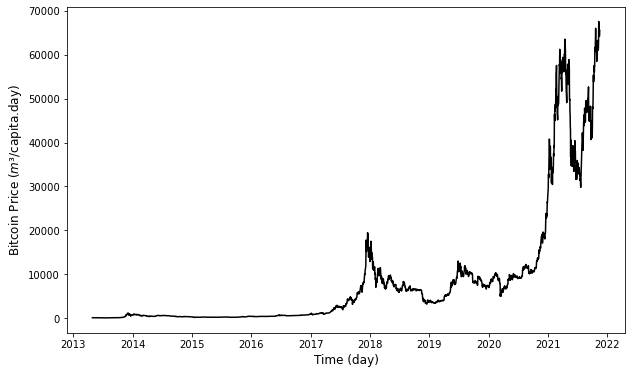

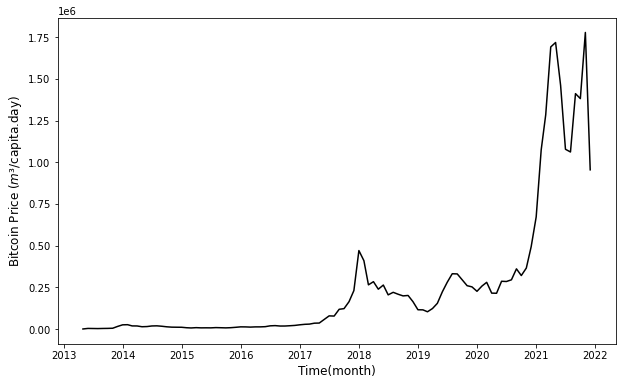

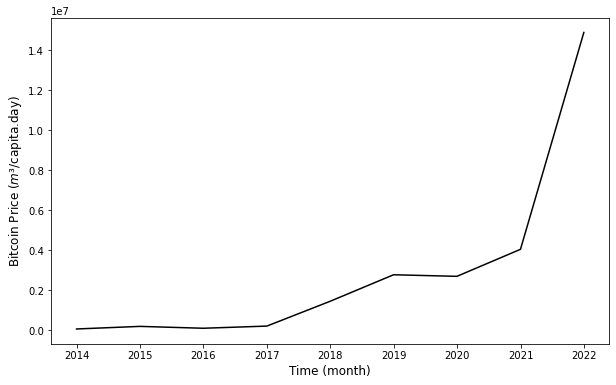

In [15]:
def timeseries (x_axis, y_axis, x_label):
    plt.figure(figsize = (10, 6))
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label, {'fontsize': 12}) 
    plt.ylabel('Bitcoin Price ($m³$/capita.day)', 
                                  {'fontsize': 12})
dataset_to_plt = dataset.copy()
dataset_to_plt = dataset_to_plt.set_index('date')
timeseries(dataset_to_plt.index, dataset_to_plt['open'], 'Time (day)')
dataset_to_plt['month'] = dataset_to_plt.index.month
dataset_by_month = dataset_to_plt.resample('M').sum()
timeseries(dataset_by_month.index, dataset_by_month['open'], 
           'Time(month)')
dataset_to_plt['year'] = dataset_to_plt.index.year
dataset_by_year = dataset_to_plt.resample('Y').sum()
timeseries(dataset_by_year.index, dataset_by_year['open'], 
           'Time (month)')

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        3124 non-null   datetime64[ns]
 1   open        3124 non-null   float64       
 2   high        3124 non-null   float64       
 3   low         3124 non-null   float64       
 4   close       3124 non-null   float64       
 5   volume      3124 non-null   float64       
 6   marketcap   3124 non-null   float64       
 7   gold_price  3124 non-null   float64       
 8   gtrend      3124 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 219.8 KB


In [17]:
# Check for missing values
print('Total num of missing values:') 
print(dataset.open.isna().sum())
print('')
# Locate the missing value
df_missing_date = dataset.loc[dataset.open.isna() == True]
print('The date of missing value:')
print(df_missing_date.loc[:,['date']])
# Replcase missing value with interpolation
dataset.open.interpolate(inplace = True)
# Keep WC and drop Date
dataset = dataset.drop('date', axis = 1)

Total num of missing values:
0

The date of missing value:
Empty DataFrame
Columns: [date]
Index: []


In [18]:
print(dataset.shape)

(3124, 8)


In [19]:
#Scaling with Min Max
scaler = MinMaxScaler().fit(dataset)
dataset_scaled = scaler.transform(dataset)


In [20]:
#EXPERIMENTAL
trainX = []
trainY = []

n_future = 1
n_past = 30

for i in range(n_past, len(dataset) - n_future +1):
    trainX.append(dataset_scaled[i - n_past:i, 0:dataset_scaled.shape[1]])
    trainY.append(dataset_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (3094, 30, 8).
trainY shape == (3094, 1).


In [21]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape=(trainX.shape[1], trainX.shape[2])))# model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(trainY.shape[1])) 
    #Compile model
    model.compile(optimizer='adam',loss='mse', metrics='mape')
    return model
model_gru = create_gru(64)

is_ragged_input : False
masuk gru_with_backend_selection
Goes to standard GRU
masuk gpu_gru_with_fallback
Masuk GPU GRU
is_ragged_input : False
masuk gru_with_backend_selection
Goes to standard GRU
masuk gpu_gru_with_fallback
Masuk GPU GRU


In [22]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 30, 64)            14208     
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                24960     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 39,233
Trainable params: 39,233
Non-trainable params: 0
_________________________________________________________________


In [23]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='checkpoint_model',
                                                 save_weights_only=True,
                                                 verbose=1)
    history = model.fit(trainX, trainY, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, verbose = 1, 
                        callbacks = [early_stop, cp_callback])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
is_ragged_input : False
masuk gru_with_backend_selection
Goes to standard GRU
masuk gpu_gru_with_fallback
Masuk GPU GRU
is_ragged_input : False
masuk gru_with_backend_selection
Goes to standard GRU
masuk gpu_gru_with_fallback
Masuk GPU GRU
is_ragged_input : False
masuk gru_with_backend_selection
Goes to standard GRU
masuk gpu_gru_with_fallback
Masuk GPU GRU
is_ragged_input : False
masuk gru_with_backend_selection
Goes to standard GRU
masuk gpu_gru_with_fallback
Masuk GPU GRU
155/155 [==============================] - ETA: 0s - loss: 2.6984e-04 - mape: 2553.1716is_ragged_input : False
masuk gru_with_backend_selection
Goes to standard GRU
masuk gpu_gru_with_fallback
Masuk GPU GRU
is_ragged_input : False
masuk gru_with_backend_selection
Goes to standard GRU
masuk gpu_gru_with_fallback
Masuk GPU GRU
155/155 [==============================] - 27s 93ms/step - loss: 2.6984e-04 - mape: 2553.1716 - val_loss: 9.6163e-04 - val_mape: 4.3490

Epoch 00001: saving model to checkpoint_mode

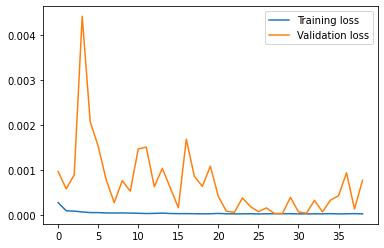

In [24]:
plt.plot(history_gru.history['loss'], label='Training loss')
plt.plot(history_gru.history['val_loss'], label='Validation loss')
plt.legend()

In [25]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [43]:
n_past = 16
n_days_for_prediction=30  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model_gru.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

[Timestamp('2021-11-01 00:00:00', freq='C'), Timestamp('2021-11-02 00:00:00', freq='C'), Timestamp('2021-11-03 00:00:00', freq='C'), Timestamp('2021-11-04 00:00:00', freq='C'), Timestamp('2021-11-05 00:00:00', freq='C'), Timestamp('2021-11-08 00:00:00', freq='C'), Timestamp('2021-11-09 00:00:00', freq='C'), Timestamp('2021-11-10 00:00:00', freq='C'), Timestamp('2021-11-12 00:00:00', freq='C'), Timestamp('2021-11-15 00:00:00', freq='C'), Timestamp('2021-11-16 00:00:00', freq='C'), Timestamp('2021-11-17 00:00:00', freq='C'), Timestamp('2021-11-18 00:00:00', freq='C'), Timestamp('2021-11-19 00:00:00', freq='C'), Timestamp('2021-11-22 00:00:00', freq='C'), Timestamp('2021-11-23 00:00:00', freq='C'), Timestamp('2021-11-24 00:00:00', freq='C'), Timestamp('2021-11-26 00:00:00', freq='C'), Timestamp('2021-11-29 00:00:00', freq='C'), Timestamp('2021-11-30 00:00:00', freq='C'), Timestamp('2021-12-01 00:00:00', freq='C'), Timestamp('2021-12-02 00:00:00', freq='C'), Timestamp('2021-12-03 00:00:00'

In [44]:
prediction_copies = np.repeat(prediction, dataset_scaled.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [45]:
import seaborn as sns

In [46]:
df = pd.read_csv(DIR + "cmc_plus_gold_fixed.csv", parse_dates = ['date'])


<AxesSubplot:xlabel='date', ylabel='open'>

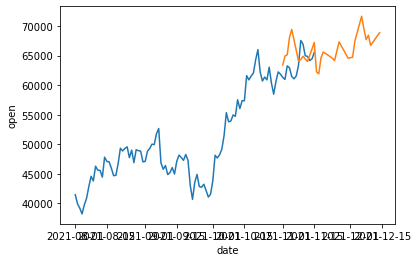

In [48]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['date', 'open']]
original['date']=pd.to_datetime(original['date'])
original = original.loc[original['date'] >= '2021-8-1']

sns.lineplot(original['date'], original['open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])

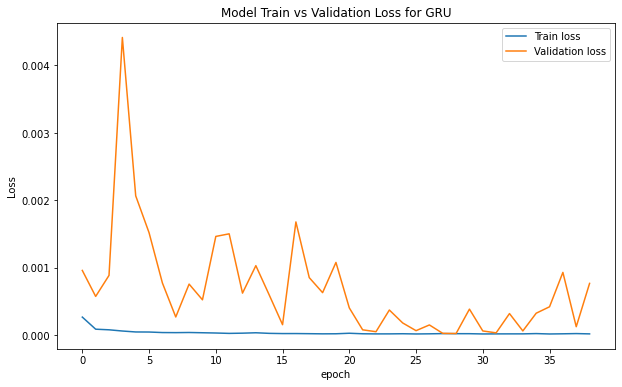

In [49]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   open        3124 non-null   float64
 1   high        3124 non-null   float64
 2   low         3124 non-null   float64
 3   close       3124 non-null   float64
 4   volume      3124 non-null   float64
 5   marketcap   3124 non-null   float64
 6   gold_price  3124 non-null   float64
 7   gtrend      3124 non-null   float64
dtypes: float64(8)
memory usage: 195.4 KB


In [51]:
#saving model in h5 format
model_gru.save('my_model_with_gtrend_gold.h5')